# Assignment: Exploratory Data Analysis with Pandas

In this assignment, you will use **Pandas** to explore the [Adult Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult). The dataset contains demographic information about individuals, and a `salary` column indicating whether they earn `<=50K` or `>50K` per year.

**Instructions:**
- Write your code in the empty cells below each question.
- Run the setup cell first to load the data.
- Use `print()` to display your final answers.

## Setup: Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


---
### Question 1
How many rows and columns does the dataset have? Use `.shape`.

In [2]:
# Your code here
print(data.shape)


(32561, 15)


---
### Question 2
What are the column names and data types? Use `.info()` or `.dtypes`.

In [3]:
# Your code here
print(data.dtypes)


age               int64
workclass           str
fnlwgt            int64
education           str
education-num     int64
marital-status      str
occupation          str
relationship        str
race                str
sex                 str
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country      str
salary              str
dtype: object


---
### Question 3
How many men and women are in the dataset? Use `.value_counts()` on the `sex` column.

In [4]:
# Your code here
print(data["sex"].value_counts())


sex
Male      21790
Female    10771
Name: count, dtype: int64


---
### Question 4
What is the average age of women in the dataset?

*Hint: Filter the dataframe where `sex == 'Female'`, then use `.mean()` on the `age` column.*

In [5]:
# Your code here
print(data[data["sex"] == "Female"]["age"].mean())


36.85823043357163


---
### Question 5
What percentage of people in the dataset are from the United States?

*Hint: Filter on `native-country`, count the rows, and divide by the total number of rows.*

In [6]:
# Your code here
us_count = data[data["native-country"] == "United-States"].shape[0]
total_count = data.shape[0]

print((us_count / total_count) * 100)


89.5857006848684


---
### Question 6
What is the average age of people who earn **>50K** vs. those who earn **<=50K**?

*Hint: Use `.groupby('salary')['age'].mean()`.*

In [7]:
# Your code here
print(data.groupby("salary")["age"].mean())


salary
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64


---
### Question 7
What are the top 5 most common occupations in the dataset?

*Hint: Use `.value_counts()` and `.head(5)` on the `occupation` column.*

In [8]:
# Your code here
print(data["occupation"].value_counts().head(5))


occupation
Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Adm-clerical       3770
Sales              3650
Name: count, dtype: int64


---
### Question 8
What is the maximum number of hours a person works per week? How many people work that many hours?

*Hint: Use `.max()` to find the maximum, then filter and count.*

In [9]:
# Your code here
max_hours = data["hours-per-week"].max()
num_people = data[data["hours-per-week"] == max_hours].shape[0]

print(max_hours)
print(num_people)


99
85


---
### Question 9
Display age statistics (count, mean, std, min, max) grouped by `race` and `sex`. Use `.groupby()` and `.describe()`.

Then answer: What is the maximum age of men in the `Amer-Indian-Eskimo` group?

In [10]:
# Your code here
print(data.groupby(["race", "sex"])["age"].describe())

max_age = data[(data["race"] == "Amer-Indian-Eskimo") & (data["sex"] == "Male")]["age"].max()
print(max_age)


                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex

---
### Question 10
What is the average `hours-per-week` for each `salary` group (`<=50K` and `>50K`)?

*Hint: Use `.groupby('salary')['hours-per-week'].mean()`.*

In [11]:
# Your code here
print(data.groupby("salary")["hours-per-week"].mean())


salary
<=50K    38.840210
>50K     45.473026
Name: hours-per-week, dtype: float64


---
## Part 2: Groupby and Aggregation

The questions below require combining filtering, grouping, and aggregation.

---
### Question 11
For each `workclass`, compute the **mean age**, **mean hours-per-week**, and **count** of people. Sort the result by count in descending order.

*Hint: Use `.groupby('workclass').agg(...)` with named aggregations. Use `.sort_values()` to sort.*

In [12]:
# Your code here
result = data.groupby("workclass").agg(
    mean_age=("age", "mean"),
    mean_hours_per_week=("hours-per-week", "mean"),
    count=("workclass", "count")
).sort_values(by="count", ascending=False)

print(result)


                   mean_age  mean_hours_per_week  count
workclass                                              
Private           36.797585            40.267096  22696
Self-emp-not-inc  44.969697            44.421881   2541
Local-gov         41.751075            40.982800   2093
?                 40.960240            31.919390   1836
State-gov         39.436055            39.031587   1298
Self-emp-inc      46.017025            48.818100   1116
Federal-gov       42.590625            41.379167    960
Without-pay       47.785714            32.714286     14
Never-worked      20.571429            28.428571      7


---
### Question 12
For each `education` level, compute the **min**, **max**, and **mean** of `hours-per-week`. Sort by mean in descending order.

Which education level has the highest average working hours?

*Hint: Use `.groupby('education')['hours-per-week'].agg(['min', 'max', 'mean'])`.*

In [13]:
# Your code here
result = data.groupby('education')['hours-per-week'].agg(['min','max','mean']).sort_values('mean', ascending=False)
print(result)

              min  max       mean
education                        
Prof-school     2   99  47.425347
Doctorate       1   99  46.973366
Masters         1   99  43.836332
Bachelors       2   99  42.614006
Assoc-voc       1   99  41.610709
HS-grad         1   99  40.575374
Assoc-acdm      1   99  40.504217
7th-8th         2   99  39.366873
5th-6th         3   84  38.897898
Some-college    1   99  38.852284
1st-4th         4   96  38.255952
9th             1   99  38.044747
10th            1   99  37.052519
Preschool      10   75  36.647059
12th            6   99  35.780600
11th            2   99  33.925957


---
### Question 13
Create a crosstab showing the **count** of people for each combination of `education` and `salary`. Then compute the **proportion** of `>50K` earners for each education level.

Which education level has the **highest** proportion of people earning >50K?

*Hint: Use `pd.crosstab(data['education'], data['salary'])`. To get proportions, divide the `>50K` column by the row total.*

In [14]:
# Your code here
ct = pd.crosstab(data['education'], data['salary'])
proportion = ct['>50K'] / ct.sum(axis=1)
print(proportion.sort_values(ascending=False))


education
Doctorate       0.740920
Prof-school     0.734375
Masters         0.556587
Bachelors       0.414753
Assoc-voc       0.261216
Assoc-acdm      0.248360
Some-college    0.190235
HS-grad         0.159509
12th            0.076212
10th            0.066452
7th-8th         0.061920
9th             0.052529
11th            0.051064
5th-6th         0.048048
1st-4th         0.035714
Preschool       0.000000
dtype: float64


---
### Question 14
Among people who work **more than 40 hours per week**, what is the average `capital-gain` for each `occupation`? Show only the **top 5** occupations by average capital-gain.

*Hint: First filter the dataframe for `hours-per-week > 40`, then use `.groupby('occupation')['capital-gain'].mean()` and `.sort_values(ascending=False).head(5)`.*

In [15]:
# Your code here
high_hours = data[data['hours-per-week'] > 40]
result = high_hours.groupby('occupation')['capital-gain'].mean().sort_values(ascending=False).head(5)
print(result)


occupation
Prof-specialty     4326.644819
Exec-managerial    3066.663636
Sales              2319.504930
?                  1365.927536
Craft-repair        821.451060
Name: capital-gain, dtype: float64


---
## Bonus (Extra Difficult)

### Bonus Question
Create a new column called `age_group` that bins ages into the following categories:
- `17-30`
- `31-45`
- `46-60`
- `61+`

Then, for **each `age_group` and `sex`**, compute a summary table with three columns:
1. **pct_over_50K** — the percentage of people earning >50K
2. **avg_hours_per_week** — the average hours worked per week
3. **most_common_occupation** — the most frequently occurring occupation

Display the result as a single DataFrame.

*Hints:*
- *Use `pd.cut()` to create the `age_group` column.*
- *Create a helper column like `is_over_50K = (data['salary'] == '>50K').astype(int)` to make computing the percentage easier.*
- *Use `.groupby(['age_group', 'sex']).agg(...)` with custom lambda functions.*
- *To find the most common value, use `.mode().iloc[0]` inside a lambda.*

In [16]:
# Your code here
# Create age_group bins
data['age_group'] = pd.cut(
    data['age'],
    bins=[17, 30, 45, 60, 150],
    labels=['17-30', '31-45', '46-60', '61+'],
    right=True
)

# Helper column for salary indicator
data['is_over_50K'] = (data['salary'] == '>50K').astype(int)

# Grouped summary table
result = data.groupby(['age_group', 'sex']).agg(
    pct_over_50K = ('is_over_50K', 'mean'),
    avg_hours_per_week = ('hours-per-week', 'mean'),
    most_common_occupation = ('occupation', lambda x: x.mode().iloc[0])
)

print(result)


                  pct_over_50K  avg_hours_per_week most_common_occupation
age_group sex                                                            
17-30     Female      0.038792           34.552664           Adm-clerical
          Male        0.085845           39.752130           Craft-repair
31-45     Female      0.166304           39.132337           Adm-clerical
          Male        0.366851           45.077862           Craft-repair
46-60     Female      0.168421           39.015311           Adm-clerical
          Male        0.472430           44.325072           Craft-repair
61+       Female      0.076819           29.898922           Adm-clerical
          Male        0.310692           34.623899                      ?


---
## Part 3: Data Visualization

The questions below require you to create visualizations using **matplotlib** and/or **seaborn**. Make sure your plots have appropriate titles, axis labels, and legends where needed.

---
### Question 15
Create a **histogram** of the `age` column with 20 bins. Add a title and axis labels.

*Hint: Use `data['age'].plot(kind='hist', bins=20)` or `plt.hist(data['age'], bins=20)`.*

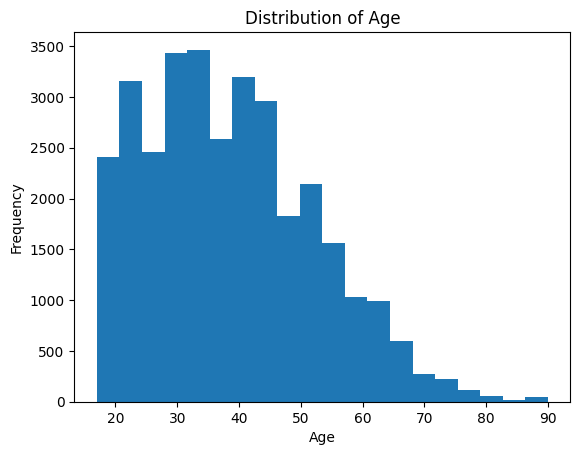

In [17]:
# Create histogram
data['age'].plot(kind='hist', bins=20)

# Add title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show plot
plt.show()


---
### Question 16
Create a **bar chart** showing the count of people in each `workclass` category. Rotate the x-axis labels for readability.

*Hint: Use `data['workclass'].value_counts().plot(kind='bar')`. Use `plt.xticks(rotation=45)` to rotate labels.*

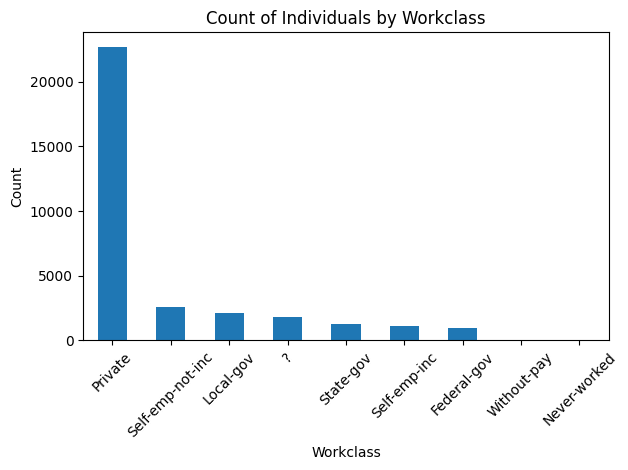

In [18]:
# Create bar chart of workclass counts
data['workclass'].value_counts().plot(kind='bar')

# Add title and labels
plt.title('Count of Individuals by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



---
### Question 17
Create a **boxplot** comparing the distribution of `age` across the two `salary` groups (`<=50K` and `>50K`).

What can you observe about the age distributions of the two groups?

*Hint: Use `sns.boxplot(x='salary', y='age', data=data)` or `data.boxplot(column='age', by='salary')`.*

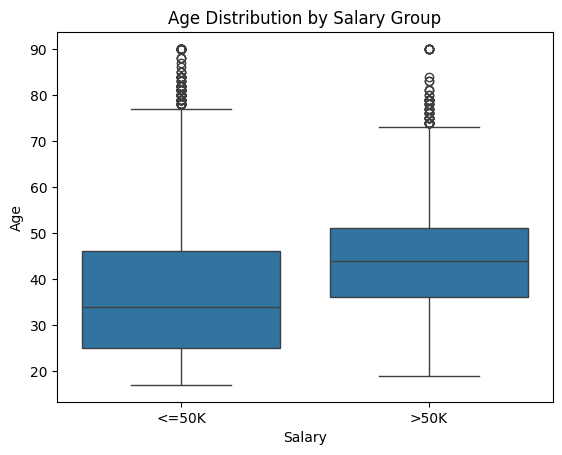

In [19]:
# Create boxplot
sns.boxplot(x='salary', y='age', data=data)

# Add title and labels
plt.title('Age Distribution by Salary Group')
plt.xlabel('Salary')
plt.ylabel('Age')

plt.show()